# Деревья решений

Деревья принятия решений являются удобным инструментом в тех случаях, когда требуется не просто классифицировать данные, но ещё и объяснить почему тот или иной объект отнесён к какому-либо классу.

*   В каждой вершине дерева находится вопрос
*   В зависимости от ответа на вопрос, алгоритм направляется в нужную ветвь  дерева
*   Листы дерева соответствуют решению алгоритма

<img src=https://hsto.org/files/194/9b6/ae9/1949b6ae97ab4fc9b1a37fbf182eda8f.gif width=500/>

$$
\begin{aligned}
\frac{L}{Q} H(p_{L}) + \frac{R}{Q} H(p_{R}) \rightarrow \min
\end{aligned}
$$

$ Q - $ число объектов в вершине     
$ L - $ количество объектов первого класса   
$ R - $ число объектов второго класса  
$ p_{L} - $ доля объектов 1-го класса в левой дочерней вершине  
$ p_{R} - $ доля объектов 1-го класса в правой дочерней вершине  

### Популярные функции потерь (измерения перемешанности результатов)

__Энтропия__ - это мера неопределенности или "беспорядка" в системе. В контексте алгоритма дерева решений энтропия используется для оценки того, насколько хорошо разбиты данные на подмножества (например, в разные классы), т. е. как критерий для разделения признаков на узлах дерева.  
Интуитивно, чем более равномерно распределены объекты по классам, тем больше энтропия в системе. И наоборот, когда все объекты принадлежат к одному классу, энтропия будет минимальной.  
Цель дерева решений - разделить данные на подмножества, которые являются максимально однородными по целевой переменной. Таким образом, при выборе, какой признак использовать для разделения данных на каждом узле дерева, мы стремимся к тому, чтобы мера неопределенности в подмножествах после разделения была как можно меньше. Если все объекты в узле принадлежат к одному классу, то энтропия равна 0, что означает, что узел является 100% однородным.

__Индекс Джини__ представляет собой вероятность того, что случайно выбранный образец из набора образцов будет неправильно классифицирован.  
Чем меньше коэффициент Джини, тем меньше вероятность того, что выбранный образец в наборе будет классифицирован неправильно, то есть чем выше чистота набора, напротив, тем менее чистым будет набор индекса Джини.  
Математическая формула: индекс Джини (примесь Джини) = вероятность того, что образец будет выбран * вероятность неправильной классификации образца.


* Энтропия:
$$
\begin{aligned}
H(q) &= -q \log q - (1-q) \log (1 - q)
\end{aligned}
$$

* Индекс Джини:
$$
\begin{aligned}
H(q) &= 4q(1-q)
\end{aligned}
$$

В общих чертах, алгоритм построения дерева принятия решений можно описать следующим образом:
```
s0 = вычисляем энтропию исходного множества

Если s0 == 0 значит:
   Все объекты исходного набора принадлежат к одному классу
   Сохраняем этот класс в качестве листа дерева

Если s0 != 0 значит:
   Перебираем все элементы исходного множества:
      Для каждого элемента перебираем все его атрибуты:
         На основе каждого атрибута генерируем предикат, который разбивает исходное множество на два подмножества
         Рассчитываем среднее значение энтропии
         Вычисляем ∆S
   Нас интересует предикат с наибольшим значением ∆S
   Найденный предикат является частью дерева принятия решений, сохраняем его

   Разбиваем исходное множество на подмножества, согласно предикату
   Повторяем данную процедуру рекурсивно для каждого подмножества
```

![](https://habrastorage.org/r/w1560/storage2/173/96f/27f/17396f27f81e9bb312f2f01aa1254dbe.png)

# Смотрим данные

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/АБД/Задания/4. Классификация_Деревья/data/trips_data.xlsx')
df.head()

,salary,city,age,vacation_preference,transport_preference,family_members,target
0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


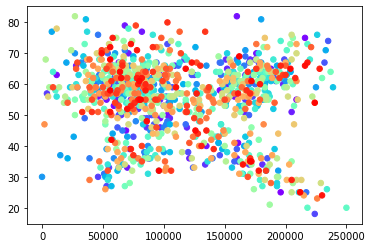

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(
    df.loc[:, 'salary'],
    df.loc[:, 'age'],
    c=df.loc[:, 'target'].index.tolist(),
    s=30,
    cmap='rainbow',
    clim=(df.loc[:, 'target'].index.min(), df.loc[:, 'target'].index.max()),
    zorder=3
  )

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   salary                1000 non-null   int64 
 1   city                  1000 non-null   object
 2   age                   1000 non-null   int64 
 3   vacation_preference   1000 non-null   object
 4   transport_preference  1000 non-null   object
 5   family_members        1000 non-null   int64 
 6   target                1000 non-null   object
dtypes: int64(3), object(4)
memory usage: 54.8+ KB


In [ ]:
list(set(df['target']))

['Sydney', 'London', 'Tokio', 'New York', 'Paris']

In [ ]:
first_row = df.iloc[0]
first_row

salary                      196000
city                     Краснодар
age                             25
vacation_preference        Шоппинг
transport_preference    Автомобиль
family_members                   1
target                    New York
Name: 0, dtype: object

In [ ]:
df.describe()

,salary,age,family_members
count,1000.000000,1000.000000,1000.000000
mean,111935.000000,55.209000,1.295000
std,54580.049073,11.925164,0.885867
min,0.000000,18.000000,0.000000
25%,68000.000000,50.000000,1.000000
50%,99000.000000,58.000000,1.000000
75%,161000.000000,63.000000,2.000000
max,250000.000000,82.000000,4.000000


<Axes: >

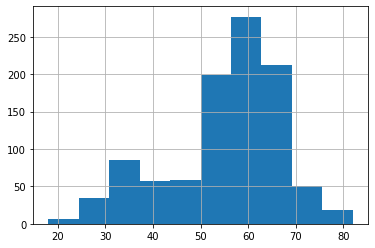

In [ ]:
df.age.hist()

<Axes: >

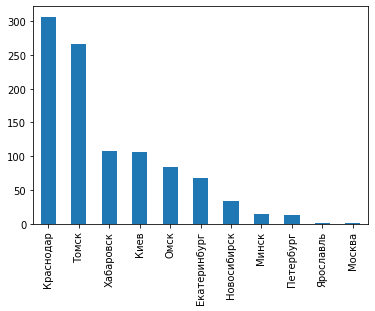

In [ ]:
df.city.value_counts().plot(kind='bar')

<Axes: >

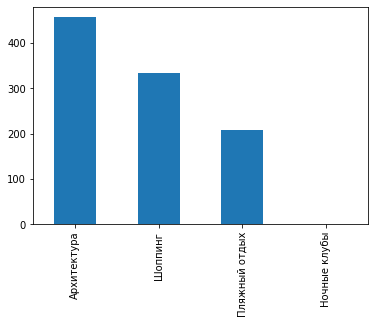

In [ ]:
df.vacation_preference.value_counts().plot(kind='bar')

<Axes: >

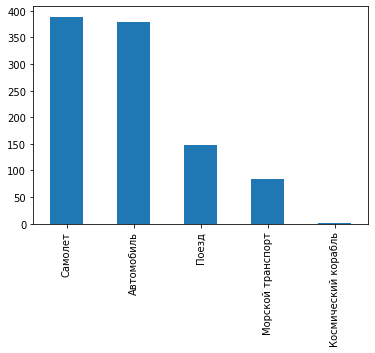

In [ ]:
df.transport_preference.value_counts().plot(kind='bar')

# Переведем все буквенные значения (категориальные хар-ки) признаков в числа: 0 и 1

In [ ]:
transformed_df = pd.get_dummies(df, columns=['city', 'vacation_preference', 'transport_preference'])
transformed_df.head()

,salary,age,family_members,target,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,196000,25,1,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,152000,60,1,London,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,83000,49,2,Sydney,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,161000,41,0,New York,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,146000,58,1,Sydney,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


# Разделим выборку на


*   Обучающую - это наш "учебник"
*   Проверочную - это наш "экзамен"



In [ ]:
X = transformed_df.drop('target', axis=1)
Y = transformed_df.target

In [ ]:
from sklearn.model_selection import train_test_split

### Делим выборку в отношении 70% : 30%

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

first_tree = DecisionTreeClassifier(random_state=13, max_depth=2)
first_tree

DecisionTreeClassifier(max_depth=2, random_state=13)

In [ ]:
try:
  first_tree.fit(X_train, Y_train)
except Exception as e:
  print(e)

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(first_tree, out_file='first_tree.dot', feature_names=X_train.columns, filled=True)

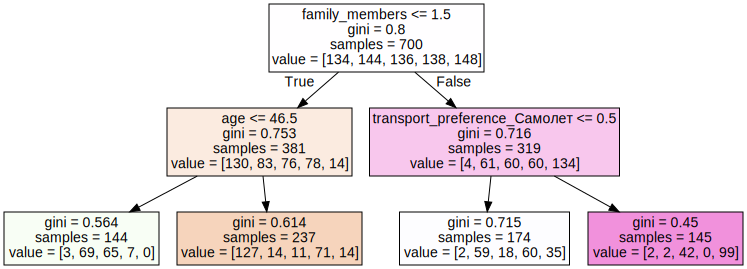

In [ ]:
import graphviz
from IPython.core.display import display

with open("first_tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(first_tree, feature_names=list(X.columns))
print(tree_rules)

|--- family_members <= 1.50
|   |--- age <= 46.50
|   |   |--- class: New York
|   |--- age >  46.50
|   |   |--- class: London
|--- family_members >  1.50
|   |--- transport_preference_Самолет <= 0.50
|   |   |--- class: Sydney
|   |--- transport_preference_Самолет >  0.50
|   |   |--- class: Tokio



In [ ]:
list(set(df['target']))

['Sydney', 'London', 'Tokio', 'New York', 'Paris']

In [ ]:
prediction = first_tree.predict(X_test)
prediction

array(['New York', 'Sydney', 'Sydney', 'Sydney', 'Tokio', 'London',
       'New York', 'Sydney', 'London', 'Sydney', 'London', 'London',
       'New York', 'Tokio', 'London', 'Tokio', 'London', 'New York',
       'Tokio', 'London', 'New York', 'New York', 'Sydney', 'Tokio',
       'Tokio', 'New York', 'London', 'New York', 'New York', 'London',
       'Sydney', 'Tokio', 'London', 'Tokio', 'Sydney', 'New York',
       'Sydney', 'New York', 'London', 'Tokio', 'Tokio', 'Sydney',
       'Sydney', 'New York', 'Sydney', 'London', 'Sydney', 'London',
       'Tokio', 'London', 'Sydney', 'London', 'London', 'Sydney',
       'London', 'Sydney', 'Tokio', 'New York', 'London', 'London',
       'Tokio', 'London', 'London', 'New York', 'Tokio', 'New York',
       'London', 'London', 'Tokio', 'Sydney', 'London', 'Sydney', 'Tokio',
       'New York', 'London', 'New York', 'London', 'Sydney', 'New York',
       'Tokio', 'London', 'London', 'Tokio', 'Tokio', 'London', 'London',
       'London', 'Tokio',

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, prediction)

0.4766666666666667

# Модель RandomForest
Чтобы не заморачиваться над критерием остановки при построении дерева, можно поступить следующим образом: выбирать случайные подмножества из обучающей выборки данных, и для каждого подмножества строить своё дерево принятия решений.  

Полученный в результате __ансамбль деревьев__ можно использовать для классификации, прогоняя классифицируемый объект через все деревья. Каждое дерево как будто «голосует» за принадлежность объекта к определённому классу. Таким образом, на основе того, какая часть деревьев проголосовала за тот или иной класс — можно заключить с какой вероятностью объект принадлежит к какому либо классу.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RFC = RandomForestClassifier()
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [ ]:
list(df.columns[:-1])

['salary',
 'city',
 'age',
 'vacation_preference',
 'transport_preference',
 'family_members']

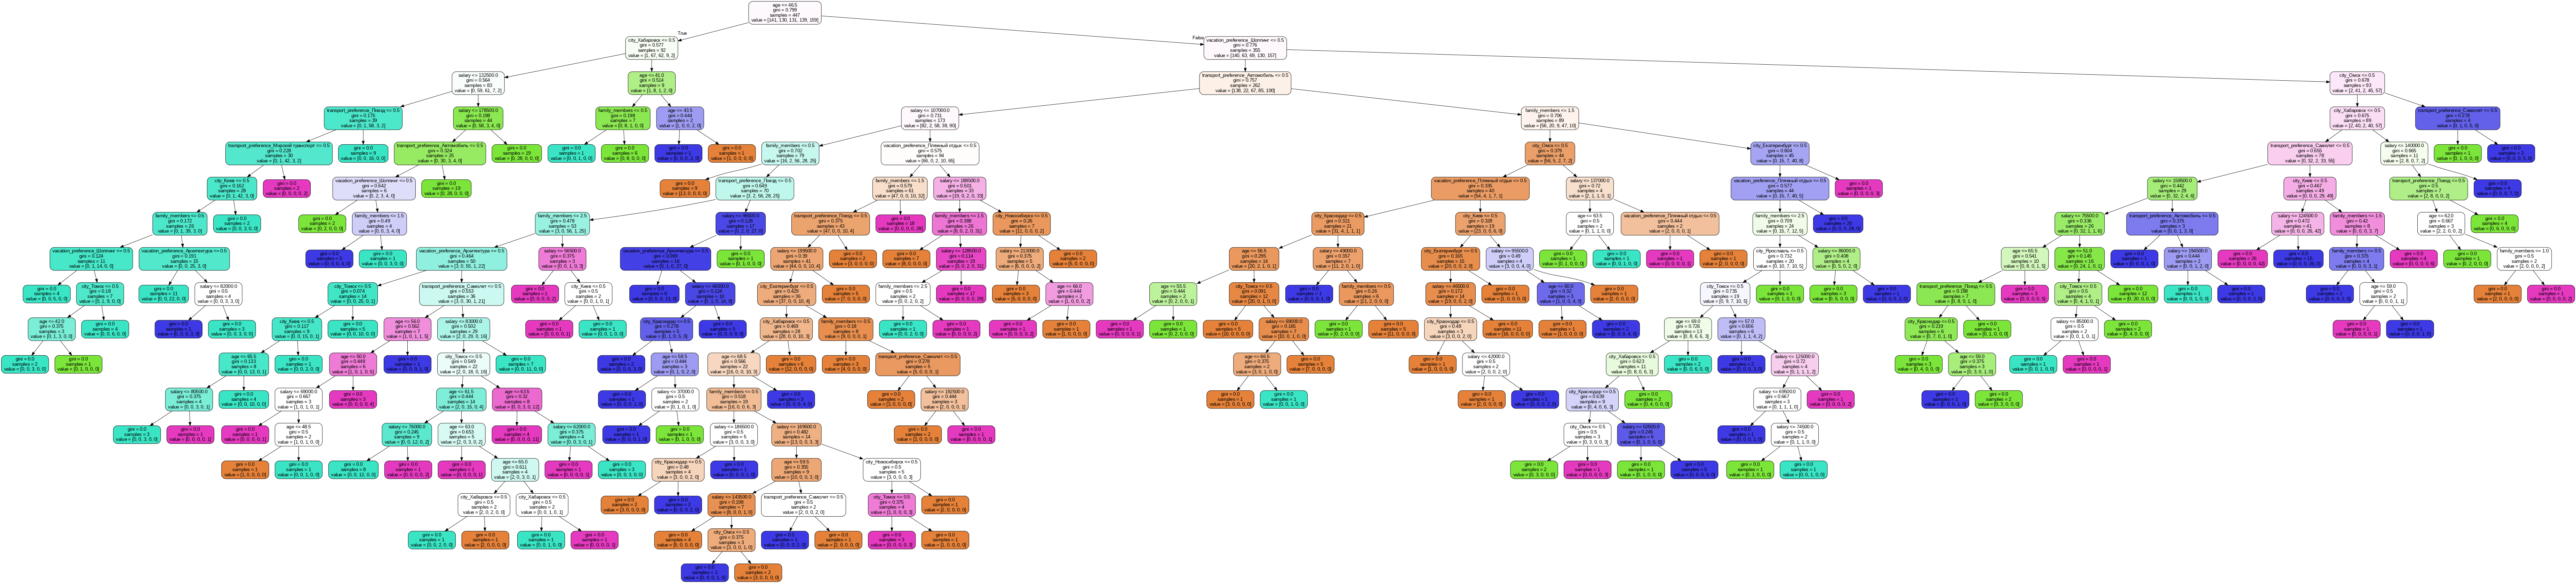

In [ ]:
from sklearn.tree import export_graphviz

for tree_in_forest in RFC.estimators_:
  export_graphviz(
      tree_in_forest,
      out_file='/content/tree.dot',
      feature_names=X_train.columns,
      rounded=True,
      filled=True,
      proportion=False
  )
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'RFC_tree.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'RFC_tree.png')

In [ ]:
RFC.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1296975464),
 DecisionTreeClassifier(max_features='sqrt', random_state=1407314617),
 DecisionTreeClassifier(max_features='sqrt', random_state=938876921),
 DecisionTreeClassifier(max_features='sqrt', random_state=771689983),
 DecisionTreeClassifier(max_features='sqrt', random_state=193356622),
 DecisionTreeClassifier(max_features='sqrt', random_state=735633625),
 DecisionTreeClassifier(max_features='sqrt', random_state=898224330),
 DecisionTreeClassifier(max_features='sqrt', random_state=208415273),
 DecisionTreeClassifier(max_features='sqrt', random_state=1512916226),
 DecisionTreeClassifier(max_features='sqrt', random_state=953168362),
 DecisionTreeClassifier(max_features='sqrt', random_state=519464557),
 DecisionTreeClassifier(max_features='sqrt', random_state=1373211780),
 DecisionTreeClassifier(max_features='sqrt', random_state=2014084876),
 DecisionTreeClassifier(max_features='sqrt', random_state=1244511435),
 DecisionTreeC

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(RFC.estimators_[0], feature_names=list(X.columns))
print(tree_rules)

|--- vacation_preference_Пляжный отдых <= 0.50
|   |--- transport_preference_Автомобиль <= 0.50
|   |   |--- transport_preference_Поезд <= 0.50
|   |   |   |--- age <= 71.50
|   |   |   |   |--- vacation_preference_Архитектура <= 0.50
|   |   |   |   |   |--- city_Краснодар <= 0.50
|   |   |   |   |   |   |--- age <= 60.50
|   |   |   |   |   |   |   |--- city_Омск <= 0.50
|   |   |   |   |   |   |   |   |--- family_members <= 0.50
|   |   |   |   |   |   |   |   |   |--- city_Томск <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3.0
|   |   |   |   |   |   |   |   |   |--- city_Томск >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |   |--- family_members >  0.50
|   |   |   |   |   |   |   |   |   |--- transport_preference_Самолет <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |   |   |   |   |--- transport_preference_Самолет >  0.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 54.50
| 

In [ ]:
prediction = RFC.predict(X_test)
prediction

array(['Paris', 'Sydney', 'Tokio', 'Paris', 'Tokio', 'Paris', 'New York',
       'Tokio', 'London', 'Sydney', 'Paris', 'Paris', 'Paris', 'Paris',
       'Paris', 'Paris', 'Sydney', 'Paris', 'Tokio', 'Sydney', 'Paris',
       'Paris', 'New York', 'Tokio', 'Tokio', 'New York', 'Tokio',
       'New York', 'Paris', 'Sydney', 'Paris', 'Paris', 'London', 'Paris',
       'New York', 'Paris', 'Tokio', 'Paris', 'London', 'Tokio', 'Tokio',
       'Paris', 'New York', 'Paris', 'New York', 'New York', 'New York',
       'London', 'New York', 'London', 'Sydney', 'London', 'London',
       'Sydney', 'London', 'Paris', 'Paris', 'Paris', 'London', 'Sydney',
       'Tokio', 'Sydney', 'London', 'Paris', 'Paris', 'Paris', 'Sydney',
       'London', 'Tokio', 'New York', 'London', 'New York', 'Tokio',
       'Paris', 'London', 'Paris', 'London', 'Sydney', 'New York',
       'Tokio', 'Paris', 'London', 'Tokio', 'Tokio', 'Sydney', 'Sydney',
       'Sydney', 'Paris', 'Sydney', 'Paris', 'London', 'Tokio',
    

In [ ]:
accuracy_score(Y_test, prediction)

0.88

# Важность колонок - какие характеристики играют наиболее важную роль?

In [ ]:
important_columns = pd.Series(data=RFC.feature_importances_, index=X_train.columns)

important_columns.sort_values(ascending=False, inplace=False)

salary                                      0.230354
age                                         0.202628
family_members                              0.156619
vacation_preference_Шоппинг                 0.065472
transport_preference_Самолет                0.062870
transport_preference_Автомобиль             0.042257
transport_preference_Поезд                  0.035967
vacation_preference_Пляжный отдых           0.033381
vacation_preference_Архитектура             0.031462
transport_preference_Морской транспорт      0.024476
city_Краснодар                              0.023092
city_Томск                                  0.020176
city_Екатеринбург                           0.015316
city_Киев                                   0.015066
city_Хабаровск                              0.014259
city_Омск                                   0.012562
city_Новосибирск                            0.006959
city_Минск                                  0.003551
city_Петербург                              0.

# Подбор гиперпараметров

In [ ]:
from sklearn.model_selection import GridSearchCV
import numpy as np

depths = np.arange(1, 21)
features = [.25, .5, .7, 1]  # Количество признаков, которые следует учитывать при поиске наилучшего разделения
samples_leaf = list(range(5, 100, 10))  # Минимальное количество образцов, допустимое в листе

tree_params = {'criterion':['gini','entropy'], 'max_depth': depths,  'max_features': features, 'min_samples_leaf': samples_leaf}

tree_grid = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=3, n_jobs=-1)
tree_grid

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'max_features': [0.25, 0.5, 0.7, 1],
                         'min_samples_leaf': [5, 15, 25, 35, 45, 55, 65, 75, 85,
                                              95]})

In [ ]:
tree_grid.fit(X_train, Y_train)
print(tree_grid.best_score_, tree_grid.best_params_)

0.8099971876795911 {'criterion': 'entropy', 'max_depth': 19, 'max_features': 0.7, 'min_samples_leaf': 5}


In [ ]:
tree_bp = DecisionTreeClassifier(criterion='gini', max_depth=16, max_features=0.7, min_samples_leaf=5)
tree_bp.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=16, max_features=0.7, min_samples_leaf=5)

In [ ]:
list(set(df['target']))

['Sydney', 'London', 'Tokio', 'New York', 'Paris']

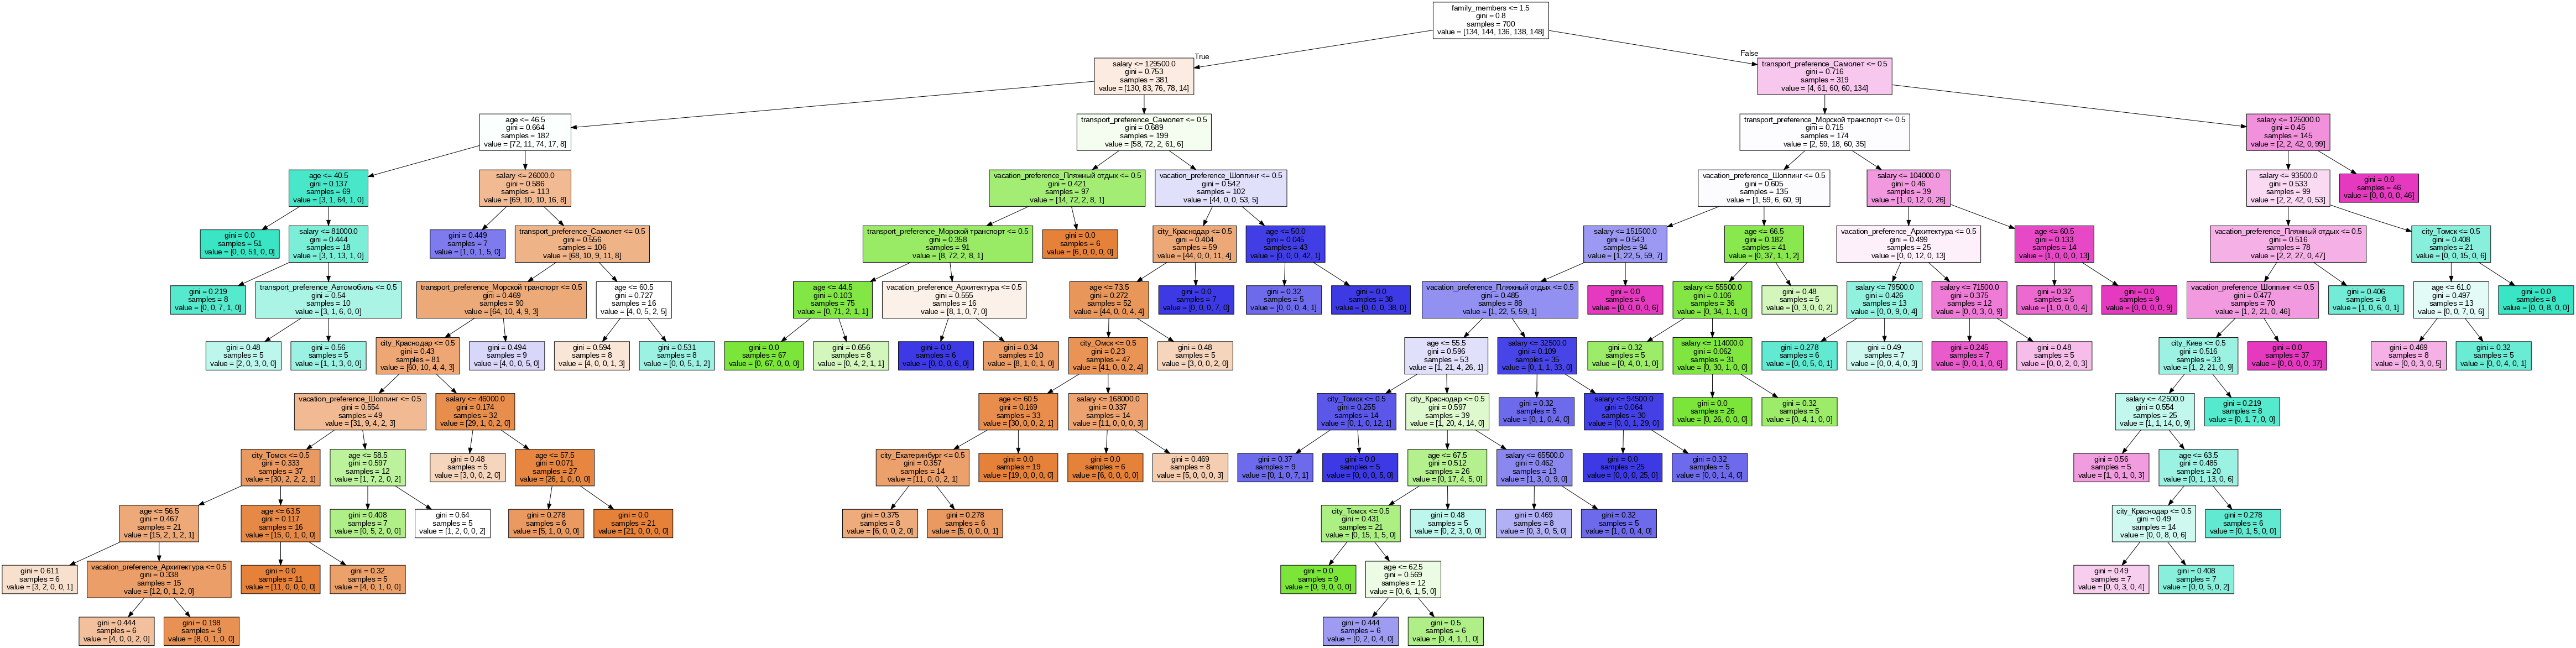

In [ ]:
export_graphviz(tree_bp, out_file='tree_bp.dot', feature_names=X_train.columns, filled=True, proportion=False)

with open("tree_bp.dot") as f:
    dot_graph = f.read()

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_bp.dot', '-o', 'tree_bp.png', '-Gdpi=70'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_bp.png')

In [ ]:
from sklearn.tree import export_text

tree_rules = export_text(tree_bp, feature_names=list(X.columns))
print(tree_rules)

|--- family_members <= 1.50
|   |--- salary <= 129500.00
|   |   |--- age <= 46.50
|   |   |   |--- age <= 40.50
|   |   |   |   |--- class: Paris
|   |   |   |--- age >  40.50
|   |   |   |   |--- salary <= 81000.00
|   |   |   |   |   |--- class: Paris
|   |   |   |   |--- salary >  81000.00
|   |   |   |   |   |--- transport_preference_Автомобиль <= 0.50
|   |   |   |   |   |   |--- class: Paris
|   |   |   |   |   |--- transport_preference_Автомобиль >  0.50
|   |   |   |   |   |   |--- class: Paris
|   |   |--- age >  46.50
|   |   |   |--- salary <= 26000.00
|   |   |   |   |--- class: Sydney
|   |   |   |--- salary >  26000.00
|   |   |   |   |--- transport_preference_Самолет <= 0.50
|   |   |   |   |   |--- transport_preference_Морской транспорт <= 0.50
|   |   |   |   |   |   |--- city_Краснодар <= 0.50
|   |   |   |   |   |   |   |--- vacation_preference_Шоппинг <= 0.50
|   |   |   |   |   |   |   |   |--- city_Томск <= 0.50
|   |   |   |   |   |   |   |   |   |--- age <= 56.

In [ ]:
prediction = tree_bp.predict(X_test)
prediction

array(['Paris', 'New York', 'New York', 'Paris', 'Tokio', 'Paris',
       'Paris', 'Tokio', 'London', 'Sydney', 'Paris', 'London', 'Paris',
       'Paris', 'Paris', 'Paris', 'Sydney', 'Paris', 'Tokio', 'Sydney',
       'Paris', 'Paris', 'Sydney', 'Tokio', 'Tokio', 'New York', 'London',
       'New York', 'Paris', 'Sydney', 'Paris', 'Paris', 'London', 'Paris',
       'New York', 'Paris', 'Tokio', 'Paris', 'London', 'Tokio', 'Tokio',
       'Paris', 'New York', 'Paris', 'New York', 'London', 'New York',
       'London', 'Paris', 'London', 'Sydney', 'London', 'London',
       'Sydney', 'New York', 'Tokio', 'Paris', 'Paris', 'London',
       'Sydney', 'Tokio', 'Sydney', 'London', 'Paris', 'Tokio', 'Paris',
       'Sydney', 'London', 'Tokio', 'New York', 'London', 'New York',
       'Tokio', 'New York', 'London', 'Paris', 'London', 'Sydney',
       'New York', 'Tokio', 'Paris', 'London', 'Tokio', 'Tokio', 'Sydney',
       'Sydney', 'London', 'Paris', 'Sydney', 'Tokio', 'London', 'Tokio',
  

In [ ]:
accuracy_score(Y_test, prediction)

0.81

# Проверим обученную модель на конкретном примере

In [ ]:
X_train.columns

Index(['salary', 'age', 'family_members', 'city_Екатеринбург', 'city_Киев',
       'city_Краснодар', 'city_Минск', 'city_Москва', 'city_Новосибирск',
       'city_Омск', 'city_Петербург', 'city_Томск', 'city_Хабаровск',
       'city_Ярославль', 'vacation_preference_Архитектура',
       'vacation_preference_Ночные клубы', 'vacation_preference_Пляжный отдых',
       'vacation_preference_Шоппинг', 'transport_preference_Автомобиль',
       'transport_preference_Космический корабль',
       'transport_preference_Морской транспорт', 'transport_preference_Поезд',
       'transport_preference_Самолет'],
      dtype='object')

In [ ]:
{col:0 for col in X_train.columns}

{'salary': 0,
 'age': 0,
 'family_members': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0}

In [ ]:
example = {'salary': 60000,
 'age': 24,
 'family_members': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 1,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'vacation_preference_Архитектура': 1,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 1,
 'transport_preference_Самолет': 0}

In [ ]:
example_df = pd.DataFrame(data=[example])
example_df.head()

,salary,age,family_members,city_Екатеринбург,city_Киев,city_Краснодар,city_Минск,city_Москва,city_Новосибирск,city_Омск,...,city_Ярославль,vacation_preference_Архитектура,vacation_preference_Ночные клубы,vacation_preference_Пляжный отдых,vacation_preference_Шоппинг,transport_preference_Автомобиль,transport_preference_Космический корабль,transport_preference_Морской транспорт,transport_preference_Поезд,transport_preference_Самолет
0,60000,24,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0


### first_tree

In [ ]:
first_tree.predict(example_df)

array(['New York'], dtype=object)

In [ ]:
probability = pd.Series(data=first_tree.predict_proba(example_df)[0], index=first_tree.classes_)
probability.sort_values(ascending=False)

New York    0.479167
Paris       0.451389
Sydney      0.048611
London      0.020833
Tokio       0.000000
dtype: float64

### tree_bp

In [ ]:
tree_bp.predict(example_df)

array(['Paris'], dtype=object)

In [ ]:
tree_bp.predict_proba(example_df)[0]

array([0., 0., 1., 0., 0.])

In [ ]:
tree_bp.classes_

array(['London', 'New York', 'Paris', 'Sydney', 'Tokio'], dtype=object)

In [ ]:
probability = pd.Series(data=tree_bp.predict_proba(example_df)[0], index=tree_bp.classes_)
probability.sort_values(ascending=False)

Paris       1.0
London      0.0
New York    0.0
Sydney      0.0
Tokio       0.0
dtype: float64

Возможно, это связано с тем, что дерево решений tree_bp имеет глубокие ветви, которые приводят к жестким правилам классификации. Если новые данные точно соответствуют правилам в этих ветвях, то они будут классифицированы с вероятностью равной единице.
```
|--- family_members <= 1.50
|   |--- salary <= 129500.00
|   |   |--- age <= 46.50
|   |   |   |--- age <= 40.50
|   |   |   |   |--- class: Paris
```

Также возможно, что дерево решений переобучилось на обучающих данных и не может обобщить на новые данные, что приводит к переоценке вероятностей классификации.

### RFC

In [ ]:
RFC.predict(example_df)

array(['Paris'], dtype=object)

In [ ]:
probability = pd.Series(data=RFC.predict_proba(example_df)[0], index=RFC.classes_)
probability.sort_values(ascending=False)

Paris       0.72
New York    0.18
London      0.08
Sydney      0.02
Tokio       0.00
dtype: float64

# Домашнее задание
Построить дерево решений и ансамбль деревьев для датасета цветков ириса, подобрав наилучшие гиперпараметры  
Сравнить полученные результаты (проверить на новых сгенерированных данных и оценить accuracy)  
Визуализировать результаты